# Simple Linear Regression
- This notebook contains the code to implement the Simple Linear Regression algorithm from scratch using the `Normal Equation` method

## Importing Libraries

In [1]:
# data manipulation
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt

# dataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# linear regression
from sklearn.linear_model import LinearRegression

# metrics
from sklearn.metrics import (mean_absolute_error,
                             mean_squared_error,
                             r2_score)

# timing
from timeit import default_timer as timer

## Linear Regression Class
- This class can implement both Simple and Multiple Linear Regression algorithms naturally
- In this notebook however, we will use it to implement the Simple Linear Regression algorithm

In [2]:
class CustomLinearRegression:

  def __init__(self):
    pass


  def fit(self, X, y):
    # this method will train the Linear Regression model

    n, p = X.shape
    b_ = np.ones((n, 1))
    X_b = np.hstack((b_, X))
    y = y.reshape(-1, 1)

    start_time = timer()
    theta = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
    end_time = timer()

    theta = theta.ravel()
    self.b = theta[0]
    self.w = theta[1:]

    print("> Successfully trained Linear Regression Model...")
    print("> Training Summary:")
    print(f"  - {'Time Taken':<12}: {end_time - start_time:,.3f}s")
    print(f"  - {'Bias':<12}: {self.b}")
    print(f"  - {'Coefficients':<12}: {self.w}")

    return self


  def predict(self, X):
    # this method will be used for making the predictions
    return np.dot(X, self.w) + self.b

## Convenience Functions

### Splitting the Data

In [3]:
def split_data(X, y, test_frac=0.2):
  total_size = X.shape[0]
  test_size = int(test_frac * total_size)
  indices = np.random.permutation(total_size)
  train_indices = indices[:-test_size]
  test_indices = indices[-test_size:]
  X_train = X[train_indices]
  y_train = y[train_indices]
  X_test = X[test_indices]
  y_test = y[test_indices]
  return (X_train, X_test, y_train, y_test)

### Evaluation Metrics

In [4]:
# mean absolute error
def mae(y_true, y_pred):
  error = y_true - y_pred
  return np.mean(np.abs(error))

In [5]:
# mean squared error
def mse(y_true, y_pred):
  error = y_true - y_pred
  return np.mean(error ** 2)

In [6]:
# root mean squared error
def rmse(y_true, y_pred):
  return mse(y_true, y_pred) ** 0.5

In [7]:
# r-squared value
def r_sq(y_true, y_pred):
  tss = ((y_true - y_train_mean) ** 2).sum()
  rss = ((y_true - y_pred) ** 2).sum()
  return 1 - (rss / tss)

In [8]:
# adjusted r-squared value
def adj_r_sq(y_true, y_pred):
  r2 = r_sq(y_true, y_pred)
  return 1 - ((1 - r2) * (n_samples - 1) / (n_samples - n_features - 1))

## Getting the Data

In [9]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [10]:
print(X.shape)

(20640, 8)


In [11]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [12]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

## Custom Implementation

In [13]:
# data for simple linear regression
X_slr = X.iloc[:, 0].values.reshape(-1, 1)
y_slr = y.values

In [14]:
# splitting train and test data
X_train, X_test, y_train, y_test = split_data(X_slr, y_slr, test_frac=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14448, 1) (14448,)
(6192, 1) (6192,)


In [15]:
# used in evaluation metrics
y_train_mean = np.mean(y_train)
n_samples, n_features = X_train.shape

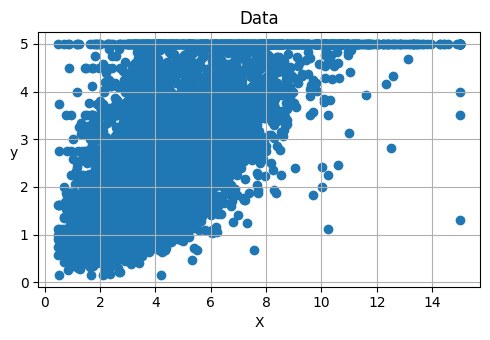

In [16]:
# visualzing the data
plt.figure(figsize=(5, 3.5))
plt.scatter(X_train.ravel(), y_train)
plt.xlabel("X")
plt.ylabel("y", rotation=0)
plt.title("Data")
plt.grid()
plt.tight_layout()
plt.show()

In [17]:
# Training the Simple Linear Regression Model
slr = CustomLinearRegression()
slr.fit(X_train, y_train)

> Successfully trained Linear Regression Model...
> Training Summary:
  - Time Taken  : 0.004s
  - Bias        : 0.45043392132853405
  - Coefficients: [0.41648556]


In [18]:
# predictions
y_pred = slr.predict(X_test)
y_pred

array([1.40410255, 1.44433505, 2.13532624, ..., 3.57407559, 1.45445565,
       2.09630154])

In [19]:
# evaluating the model
slr_mae = mae(y_test, y_pred)
slr_mse = mse(y_test, y_pred)
slr_rmse = rmse(y_test, y_pred)
slr_r2 = r_sq(y_test, y_pred)
slr_adj_r2 = adj_r_sq(y_test, y_pred)

print(f"> MAE = {slr_mae}")
print(f"> MSE = {slr_mse}")
print(f"> RMSE = {slr_rmse}")
print(f"> R2 = {slr_r2}")
print(f"> Adjusted R2 = {slr_adj_r2}")

> MAE = 0.6313454418211409
> MSE = 0.7135150601630861
> RMSE = 0.8446982065584643
> R2 = 0.46436277642177204
> Adjusted R2 = 0.4643256978378334


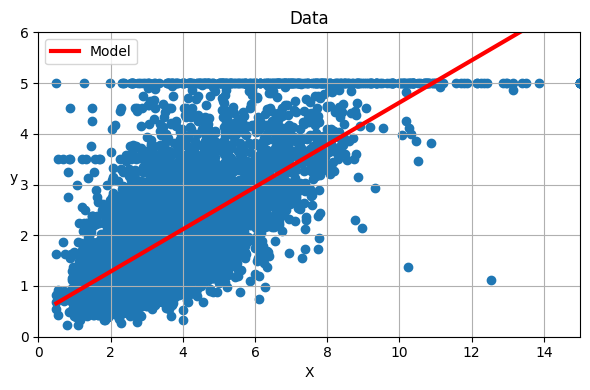

In [20]:
# visualizing the learned model
X_new = (np
         .linspace(X_test.min(),
                   X_test.max(),
                   30000)
         .reshape(-1, 1))
X_new_pred = slr.predict(X_new)

plt.figure(figsize=(6, 4))
plt.scatter(X_test.ravel(),
            y_test)
plt.plot(X_new.ravel(),
         X_new_pred,
         color="red",
         linewidth=3,
         label="Model")
plt.axis([0, 15, 0, 6])
plt.xlabel("X")
plt.ylabel("y", rotation=0)
plt.title("Data")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Scikit-learn Implementation

In [21]:
X_lr = X.iloc[:, 0].values.reshape(-1, 1)
y_lr = y.values

X_train, X_test, y_train, y_test = split_data(X_lr, y_lr, test_frac=0.3)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14448, 1) (14448,)
(6192, 1) (6192,)


In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [23]:
print(f"{'Bias':<13}: {lr.intercept_}")
print(f"{'Coefficients':<13}: {lr.coef_}")

Bias         : 0.4689120848339132
Coefficients : [0.41517168]


In [24]:
y_pred = lr.predict(X_test)
y_pred

array([1.39590741, 1.41728875, 1.56911704, ..., 2.28661673, 1.34928363,
       2.66247165])

In [25]:
lr_mae = mean_absolute_error(y_test, y_pred)
lr_mse = mean_squared_error(y_test, y_pred)
lr_rmse = mean_squared_error(y_test, y_pred, squared=False)
lr_r2 = r2_score(y_test, y_pred)
lr_adj_r2 = 1 - ((1 - lr_r2) * (n_samples - 1) / (n_samples - n_features - 1))

print(f"> MAE = {lr_mae}")
print(f"> MSE = {lr_mse}")
print(f"> RMSE = {lr_rmse}")
print(f"> R2 = {lr_r2}")
print(f"> Adjusted R2 = {lr_adj_r2}")

> MAE = 0.6206838006655298
> MSE = 0.6718812429139706
> RMSE = 0.8196836236707249
> R2 = 0.4822594314580214
> Adjusted R2 = 0.4822235917398613


## Result Comparison

In [26]:
slr_values = [slr.b,
              slr.w[0],
              slr_mae,
              slr_mse,
              slr_rmse,
              slr_r2,
              slr_adj_r2]

lr_values = [lr.intercept_,
             lr.coef_[0],
             lr_mae,
             lr_mse,
             lr_rmse,
             lr_r2,
             lr_adj_r2]

(pd
 .DataFrame({"Custom": slr_values,
             "Scikit-learn": lr_values},
            index=["b",
                   "w",
                   "mae",
                   "mse",
                   "rmse",
                   "r-squared",
                   "adj. r-squared"]))

,Custom,Scikit-learn
b,0.450434,0.468912
w,0.416486,0.415172
mae,0.631345,0.620684
mse,0.713515,0.671881
rmse,0.844698,0.819684
r-squared,0.464363,0.482259
adj. r-squared,0.464326,0.482224


## Final Remarks:
- The learned parameters and the evaluation metrics are very similar and comparable between the Custom Implementation and Scikit-learn's implementation of the Simple Linear Regression algorithm
- Although this comparison isn't the aim of this notebook, it was shown just for the sake of better understanding